In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/sample_data/Payhawk_Business_Case_Data.xlsx', sheet_name='Data')
df

,Trial ID,Lead ID,Company ID,Email Type,Existing Customer,First Trial?,Phone Provided,Trial Email Response,Trial has Demo,Trial has Email Sent,Trial has Support Ticket,Trial Product,Trial Purchase,Trial Region,Trial Source,Trial to Demo (Days),Trial to Email Response (Days),Trial to Purchase (Days),Trial Date,Trial Date End
0,751,87382197,93386200.0,Corporate,No,Not First Trial,No,Not Responded,No,No,No support,Enterprise Suite,No Purchase,Australia,LinkedIn,NaN,NaN,NaN,2022-01-01,2022-01-31
1,752,129455082,62664286.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,No support,Premium Cards,No Purchase,Asia,Google,NaN,NaN,NaN,2022-01-01,2022-01-31
2,753,100585647,92189398.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,No support,All-In-One Spend,No Purchase,North America,Google,NaN,NaN,NaN,2022-01-01,2022-01-31
3,754,404231364,14378620.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,No support,Enterprise Suite,No Purchase,Asia,LinkedIn,NaN,NaN,NaN,2022-01-01,2022-01-31
4,755,6211782,3687988.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,No support,Premium Cards,No Purchase,North America,LinkedIn,NaN,NaN,NaN,2022-01-01,2022-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37060,37052,526323150,19785208.0,Corporate,Yes,Not First Trial,Yes,Responded,No,Yes,No support,Premium Cards,No Purchase,South America,LinkedIn,NaN,NaN,NaN,2022-06-12,2022-07-12
37061,37053,556500276,9497506.0,Corporate,Yes,Not First Trial,Yes,Responded,No,Yes,Support,Enterprise Suite,No Purchase,North America,LinkedIn,NaN,NaN,NaN,2022-06-12,2022-07-12
37062,37054,556219890,228311806.0,Non Corporate,No,First Trial,Yes,Responded,No,Yes,Support,Premium Cards,No Purchase,North America,LinkedIn,NaN,NaN,NaN,2022-06-12,2022-07-12
37063,37055,556412697,191250238.0,Corporate,Yes,Not First Trial,Yes,Not Responded,No,Yes,Support,Premium Cards,No Purchase,North America,LinkedIn,NaN,NaN,NaN,2022-06-12,2022-07-12


In [ ]:
print(df.shape)
print(df.describe())
print(df.info())
print(df.dtypes)

(37065, 20)
           Trial ID       Lead ID    Company ID  Trial to Demo (Days)  \
count  37065.000000  3.706500e+04  2.095400e+04           1871.000000   
mean   19274.972184  4.556000e+08  1.260232e+08             23.981293   
min      751.000000  1.178820e+05  1.926000e+03              0.000000   
25%    10017.000000  4.788510e+08  4.460503e+07              8.000000   
50%    19283.000000  5.091437e+08  1.354311e+08             22.000000   
75%    28549.000000  5.320308e+08  2.121756e+08             36.000000   
max    37055.000000  5.660158e+08  2.334560e+08            157.000000   
std    10686.357768  1.356106e+08  8.000145e+07             17.637411   

       Trial to Email Response (Days)  Trial to Purchase (Days)  \
count                     4286.000000               3985.000000   
mean                        14.434438                 39.625596   
min                          0.000000                  0.000000   
25%                          6.000000                 11.00000

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Trial ID                              0
Lead ID                               0
Company ID                        16111
Email Type                            6
Existing Customer                     0
First Trial?                          0
Phone Provided                        0
Trial Email Response                  0
Trial has Demo                        0
Trial has Email Sent                  0
Trial has Support Ticket              0
Trial Product                         0
Trial Purchase                        0
Trial Region                          0
Trial Source                          0
Trial to Demo (Days)              35194
Trial to Email Response (Days)    32779
Trial to Purchase (Days)          33080
Trial Date                            0
Trial Date End                        0
dtype: int64


In [ ]:
drop = ['Trial to Demo (Days)', 'Trial to Email Response (Days)', 'Trial to Purchase (Days)']
df.drop(columns=drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37065 entries, 0 to 37064
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Trial ID                  37065 non-null  int64         
 1   Lead ID                   37065 non-null  int64         
 2   Company ID                20954 non-null  float64       
 3   Email Type                37059 non-null  object        
 4   Existing Customer         37065 non-null  object        
 5   First Trial?              37065 non-null  object        
 6   Phone Provided            37065 non-null  object        
 7   Trial Email Response      37065 non-null  object        
 8   Trial has Demo            37065 non-null  object        
 9   Trial has Email Sent      37065 non-null  object        
 10  Trial has Support Ticket  37065 non-null  object        
 11  Trial Product             37065 non-null  object        
 12  Trial Purchase    

In [ ]:
df['Company ID'].fillna(0, inplace=True)

<ipython-input-106-2218323800>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company ID'].fillna(0, inplace=True)


In [ ]:
#filter data just for 2022 -> Jan till 12th June

dfsample = df[(df['Trial Date'] >= '2022-01-01') & (df['Trial Date'] <= '2022-06-13')]
dfsample #not using head becasue the data size is small

,Trial ID,Lead ID,Company ID,Email Type,Existing Customer,First Trial?,Phone Provided,Trial Email Response,Trial has Demo,Trial has Email Sent,Trial has Support Ticket,Trial Product,Trial Purchase,Trial Region,Trial Source,Trial Date,Trial Date End
0,751,87382197,93386200.0,Corporate,No,Not First Trial,No,Not Responded,No,No,No support,Enterprise Suite,No Purchase,Australia,LinkedIn,2022-01-01,2022-01-31
1,752,129455082,62664286.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,No support,Premium Cards,No Purchase,Asia,Google,2022-01-01,2022-01-31
2,753,100585647,92189398.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,No support,All-In-One Spend,No Purchase,North America,Google,2022-01-01,2022-01-31
3,754,404231364,14378620.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,No support,Enterprise Suite,No Purchase,Asia,LinkedIn,2022-01-01,2022-01-31
4,755,6211782,3687988.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,No support,Premium Cards,No Purchase,North America,LinkedIn,2022-01-01,2022-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37060,37052,526323150,19785208.0,Corporate,Yes,Not First Trial,Yes,Responded,No,Yes,No support,Premium Cards,No Purchase,South America,LinkedIn,2022-06-12,2022-07-12
37061,37053,556500276,9497506.0,Corporate,Yes,Not First Trial,Yes,Responded,No,Yes,Support,Enterprise Suite,No Purchase,North America,LinkedIn,2022-06-12,2022-07-12
37062,37054,556219890,228311806.0,Non Corporate,No,First Trial,Yes,Responded,No,Yes,Support,Premium Cards,No Purchase,North America,LinkedIn,2022-06-12,2022-07-12
37063,37055,556412697,191250238.0,Corporate,Yes,Not First Trial,Yes,Not Responded,No,Yes,Support,Premium Cards,No Purchase,North America,LinkedIn,2022-06-12,2022-07-12


In [ ]:
uniques = dfsample['Trial Purchase'].unique()
print(uniques)
counts = dfsample['Trial Purchase'].value_counts(dropna=False)
print(counts)
dfsample['Trial Purchase'].isnull().sum()

['No Purchase' 'Purchase']
Trial Purchase
No Purchase    33080
Purchase        3985
Name: count, dtype: int64


np.int64(0)

In [ ]:
#binary map trial purchase so it can be calculated and split date to year, month, day and year month (for group by)

dfsample['Year'] = dfsample['Trial Date'].dt.year
dfsample['Month'] = dfsample['Trial Date'].dt.month
dfsample['Day'] = dfsample['Trial Date'].dt.day
dfsample['Year-Month'] = dfsample['Trial Date'].dt.to_period('M')
dfsample['Trial Purchase']=dfsample['Trial Purchase'].replace({"No Purchase": 0, "Purchase" : 1}).astype(int)
dfsample




<ipython-input-109-3757836803>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfsample['Trial Purchase']=dfsample['Trial Purchase'].replace({"No Purchase": 0, "Purchase" : 1}).astype(int)


,Trial ID,Lead ID,Company ID,Email Type,Existing Customer,First Trial?,Phone Provided,Trial Email Response,Trial has Demo,Trial has Email Sent,...,Trial Product,Trial Purchase,Trial Region,Trial Source,Trial Date,Trial Date End,Year,Month,Day,Year-Month
0,751,87382197,93386200.0,Corporate,No,Not First Trial,No,Not Responded,No,No,...,Enterprise Suite,0,Australia,LinkedIn,2022-01-01,2022-01-31,2022,1,1,2022-01
1,752,129455082,62664286.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,...,Premium Cards,0,Asia,Google,2022-01-01,2022-01-31,2022,1,1,2022-01
2,753,100585647,92189398.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,...,All-In-One Spend,0,North America,Google,2022-01-01,2022-01-31,2022,1,1,2022-01
3,754,404231364,14378620.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,...,Enterprise Suite,0,Asia,LinkedIn,2022-01-01,2022-01-31,2022,1,1,2022-01
4,755,6211782,3687988.0,Corporate,Yes,Not First Trial,No,Not Responded,No,No,...,Premium Cards,0,North America,LinkedIn,2022-01-01,2022-01-31,2022,1,1,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37060,37052,526323150,19785208.0,Corporate,Yes,Not First Trial,Yes,Responded,No,Yes,...,Premium Cards,0,South America,LinkedIn,2022-06-12,2022-07-12,2022,6,12,2022-06
37061,37053,556500276,9497506.0,Corporate,Yes,Not First Trial,Yes,Responded,No,Yes,...,Enterprise Suite,0,North America,LinkedIn,2022-06-12,2022-07-12,2022,6,12,2022-06
37062,37054,556219890,228311806.0,Non Corporate,No,First Trial,Yes,Responded,No,Yes,...,Premium Cards,0,North America,LinkedIn,2022-06-12,2022-07-12,2022,6,12,2022-06
37063,37055,556412697,191250238.0,Corporate,Yes,Not First Trial,Yes,Not Responded,No,Yes,...,Premium Cards,0,North America,LinkedIn,2022-06-12,2022-07-12,2022,6,12,2022-06


In [ ]:
print(dfsample['Trial Purchase'].unique())

[0 1]


In [ ]:
dfsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37065 entries, 0 to 37064
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Trial ID                  37065 non-null  int64         
 1   Lead ID                   37065 non-null  int64         
 2   Company ID                37065 non-null  float64       
 3   Email Type                37059 non-null  object        
 4   Existing Customer         37065 non-null  object        
 5   First Trial?              37065 non-null  object        
 6   Phone Provided            37065 non-null  object        
 7   Trial Email Response      37065 non-null  object        
 8   Trial has Demo            37065 non-null  object        
 9   Trial has Email Sent      37065 non-null  object        
 10  Trial has Support Ticket  37065 non-null  object        
 11  Trial Product             37065 non-null  object        
 12  Trial Purchase    

In [ ]:
#calculate the data Tom gives to ensure it is correct
monthly_trials = dfsample.groupby('Year-Month').size().reset_index(name='Actual Trials')
monthly_trials


,Year-Month,Actual Trials
0,2022-01,6824
1,2022-02,6714
2,2022-03,7404
3,2022-04,6966
4,2022-05,5536
5,2022-06,3621


In [ ]:
#project june by calculating the average number of trials per day in the 12 days we have and assume that this pace will be held until the end of the month
june = dfsample[dfsample['Year-Month'] == pd.Period('2022-06')]
june_trials = len(june)
avg_per_day = june_trials / 12
projected_trials_june = avg_per_day * 30
projected_trials_june

9052.5

In [ ]:
monthly_trials_full = monthly_trials.drop(5)
monthly_trials_full

,Year-Month,Actual Trials
0,2022-01,6824
1,2022-02,6714
2,2022-03,7404
3,2022-04,6966
4,2022-05,5536


In [ ]:
monthly_trials_full.loc[len(df)] = ["2022-06", 9052]
monthly_trials_full.reset_index(drop=True, inplace=True)
monthly_trials_full

,Year-Month,Actual Trials
0,2022-01,6824
1,2022-02,6714
2,2022-03,7404
3,2022-04,6966
4,2022-05,5536
5,2022-06,9052


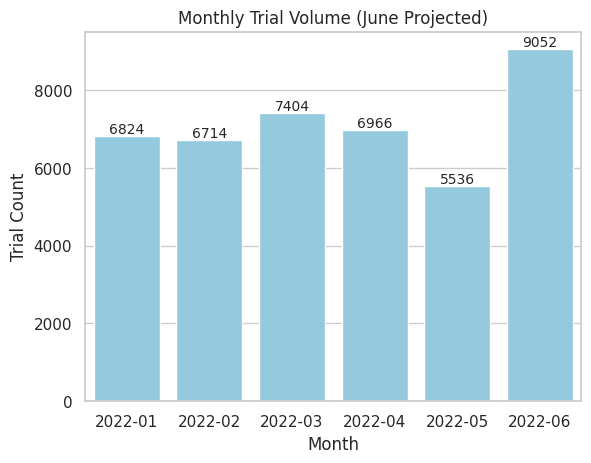

In [ ]:
ax=sns.barplot(data=monthly_trials_full, x='Year-Month', y='Actual Trials', color = 'skyblue' )
plt.title('Monthly Trial Volume (June Projected)')
plt.xlabel('Month')
plt.ylabel('Trial Count')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [ ]:
print("\nJune Projections:")
print(
    f"Until 13-June:{june_trials} trials, "
    f"Projected Monthly Trials: {projected_trials_june:.0f} total"
)


June Projections:
Until 13-June:3621 trials, Projected Monthly Trials: 9052 total


In [ ]:
# purchases - shows trials until day 12, the conv rate unitl day 12 - conversions until the day/trials until the day

def daily_conversion(df, cutoff_day):
  records=[]
  for period, grp in dfsample.groupby('Year-Month'):
    trials = len(grp) #how many trials started in that month
    conversions = grp['Trial Purchase'].sum() #how many conversions happened in that month
    grp_day = grp[grp['Day'] <= cutoff_day] #just the trials that began before the cutoff day
    trials_day  = len(grp_day) #count the trials
    conv_day = grp_day['Trial Purchase'].sum()#count how many trials coverted before the cutoff
    records.append({
            'Year-Month': period,
            f'Trials started until the {cutoff_day}': trials_day,
            f'Coversion rate by the {cutoff_day} (%)': f"{(conv_day / trials_day *100):.2f}%" if trials_day else None,
            'Conversion rate per month (%)': f"{(conversions / trials *100):.2f}%",
            'Actual Trials': len(grp),
            'Actual Conversions': conversions
        })
  return pd.DataFrame(records)

conv = daily_conversion(dfsample, 12)
print("\nConversion Day-12 vs. Full:")
print(conv)



Conversion Day-12 vs. Full:
  Year-Month  Trials started until the 12 Coversion rate by the 12 (%)  \
0    2022-01                         2345                       15.44%   
1    2022-02                         2762                       14.34%   
2    2022-03                         2817                       15.83%   
3    2022-04                         2736                       10.05%   
4    2022-05                         2587                        8.62%   
5    2022-06                         3621                        1.49%   

  Conversion rate per month (%)  Actual Trials  Actual Conversions  
0                        15.14%           6824                1033  
1                        13.06%           6714                 877  
2                        12.84%           7404                 951  
3                         9.76%           6966                 680  
4                         7.04%           5536                 390  
5                         1.49%       

In [ ]:
conversions1 = dfsample['Trial Purchase'].sum()
conversions1

np.int64(3985)

In [ ]:
#additional analysis by product

by_prod = dfsample.groupby(['Year-Month', 'Trial Product']).agg(
    trials=('Trial ID', 'count'),
    purchases=('Trial Purchase', 'sum')
).reset_index()
by_prod['ConvPct'] = by_prod['purchases'] / by_prod['trials']
print("\nMonthly Trials by Product:")
print(by_prod.pivot(index='Trial Product', columns='Year-Month', values='trials').fillna(0).astype(int))


Monthly Trials by Product:
Year-Month        2022-01  2022-02  2022-03  2022-04  2022-05  2022-06
Trial Product                                                         
All-In-One Spend     2411     2203     2361     2431     2009     1366
Enterprise Suite     1641     1772     1911     1606     1229      771
Premium Cards        2772     2739     3132     2929     2298     1484


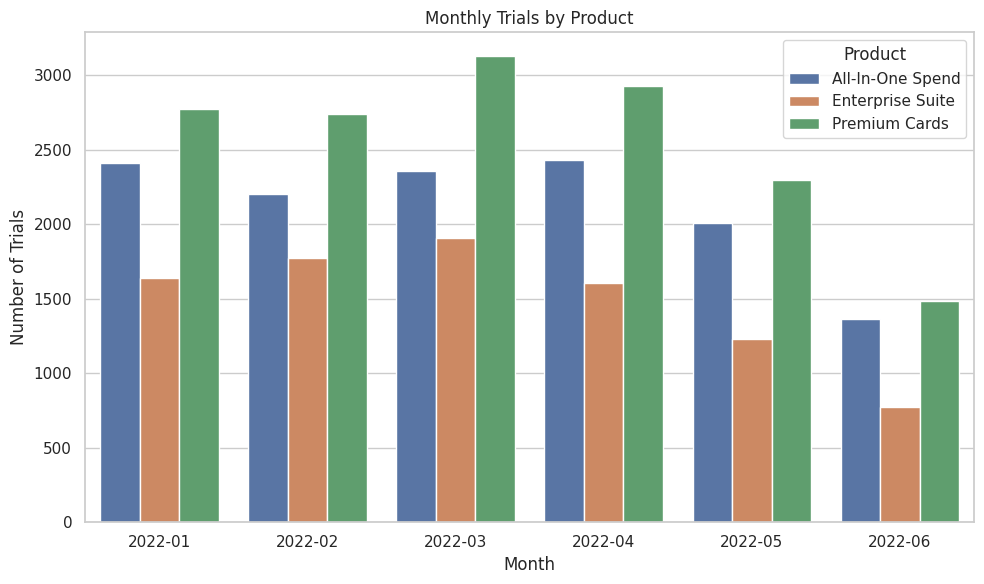

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6),)
sns.barplot(
    data=by_prod,
    x='Year-Month',
    y='trials',
    hue='Trial Product',

)
plt.title('Monthly Trials by Product')
plt.xlabel('Month')
plt.ylabel('Number of Trials')
plt.legend(title='Product')
plt.tight_layout()
plt.show()

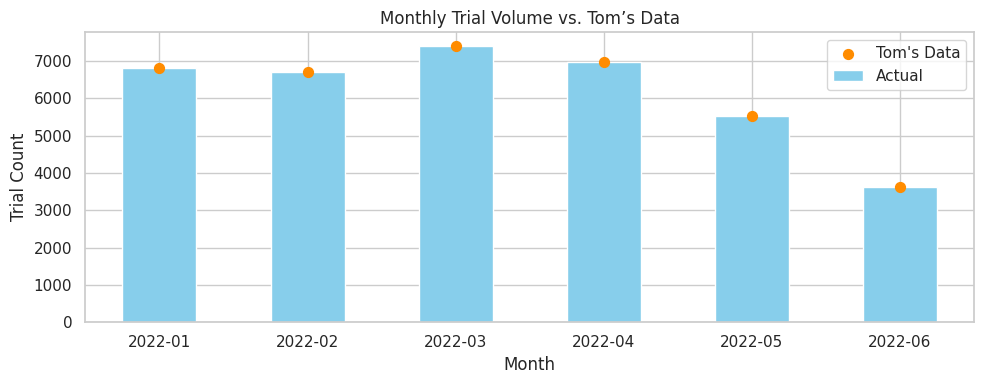

In [ ]:
#graph to compare actuals vs toms data
monthly = dfsample.groupby('Year-Month').size()
toms = pd.Series(
    [6824, 6714, 7404, 6966, 5536, dfsample[dfsample['Year-Month']==pd.Period('2022-06')].shape[0]],
    index=pd.period_range('2022-01', '2022-06', freq='M')
)

plt.figure(figsize=(10,4))
monthly.plot(kind='bar', color='skyblue', label='Actual')
plt.scatter(range(len(toms)), toms, color='darkorange', s=50, label="Tom's Data")
plt.title('Monthly Trial Volume vs. Tom’s Data')
plt.xlabel('Month')
plt.ylabel('Trial Count')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()

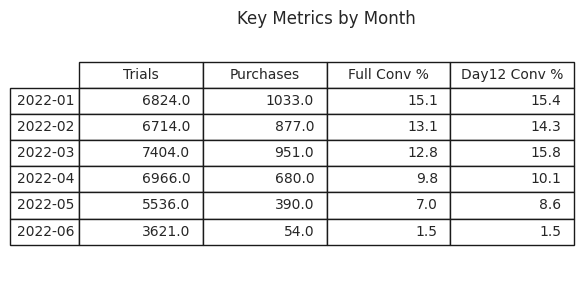

In [ ]:
metrics = pd.DataFrame({
    'Trials': monthly,
    'Purchases': dfsample.groupby('Year-Month')['Trial Purchase'].sum(),
    'Full Conv %': full,
    'Day12 Conv %': early
})

fig, ax = plt.subplots(figsize=(6,3))
ax.axis('off')
tbl = ax.table(
    cellText=metrics.round(1).values,
    colLabels=metrics.columns,
    rowLabels=[str(m) for m in metrics.index],
    loc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)
plt.title('Key Metrics by Month')
plt.tight_layout()

plt.show()